### <span style="color: yellow; ">Pattern Recognition, Advanced Report</span>

See 'theory.ipynb' for the theoretical explanation.

####  <span style="color: yellow; ">import modules</span>

In this report, we cannot use third party libraries, such as `scikit-learn`. However, the use of `numpy`, `pandas` and `matplotlib.pyplot` is considered acceptable.

See modules/MyModel.ipynb or other files to see the architechture and the reference.

In [1]:
import sys

import itertools
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('./modules')
from my_model import MyModel
from Phi_generator import PhiGenerator
from splitter import Splitter
from k_fold_CV import KFoldCV
from visualizer import Visualizer

#### <span style="color: yellow; ">Import data</span>

This data is from https://archive.ics.uci.edu/ml/datasets/Energy+efficiency

<span style="color: red; ">**Citation**</span>
* Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.
* A. Tsanas, A. Xifara: 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools', Energy and Buildings, Vol. 49, pp. 560-567, 2012
* A. Tsanas, 'Accurate telemonitoring of Parkinsonâ€™s disease symptom severity using nonlinear speech signal processing and statistical machine learning', D.Phil. thesis, University of Oxford, 2012

<span style="color: red; ">**Objective**</span>
The aim is to use eight features about building shapes to predict two responses representing energy efficiency.

In [2]:
csv_data = pd.read_csv('./dataset/ENB2012_data.csv').values

X = csv_data[:, :8]
Y = csv_data[:, 8:]

num_samples = csv_data.shape[0]
input_size = X.shape[1]
output_size = Y.shape[1]

print('the number of the samples: ', str(num_samples))
print('the number of the X dimentions: ', str(input_size))
print('the number of the Y dimentions: ', str(output_size))

the number of the samples:  768
the number of the X dimentions:  8
the number of the Y dimentions:  2


#### <span style="color: yellow; ">Try regression</span>

First, we use the linear basis function.

expected function :
y_{0} =
43417.90505197566 x_{0}
	 + -27987.856349045076 x_{1}
	 + -34.041274337517834 x_{2}
	 + 1.4075737533373789 x_{3}
	 + 2.2836657526996436 x_{4}
	 + 4.016560562305783 x_{5}
	 + -0.015381944444415624 x_{6}
	 + 16.666835858588584 x_{7}
	 + -0.08772159090903209 x_{8}
y_{1} =
46985.7886620873 x_{0}
	 + -30284.131138998702 x_{1}
	 + -36.86491100557217 x_{2}
	 + 1.5350654723461854 x_{3}
	 + 2.542762904819544 x_{4}
	 + 4.109513002949449 x_{5}
	 + 0.18012500000003817 x_{6}
	 + 12.655156565659823 x_{7}
	 + -0.1280719696968866 x_{8}
train_loss: 310815.21867891366
test_loss: 310510.73895218497


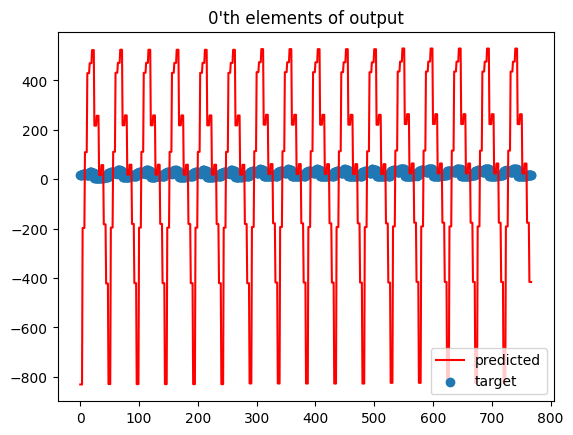

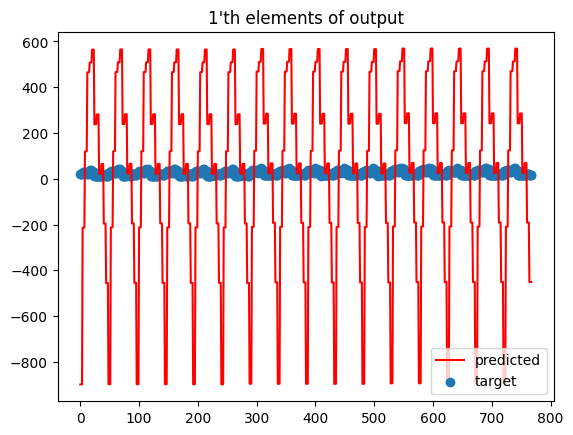

In [3]:
generator = PhiGenerator(X)
Phi = generator.generatePhi('linear')

ridge_coeff = 0

splitter = Splitter(Phi, Y, num_splits=4, shuffle=False)
Phi_train, Phi_test, Y_train, Y_test = splitter.split()

model = MyModel()
_ = model.fit(Phi_train, Y_train, ridge_coeff=ridge_coeff, verbose=True)

train_loss = model.calcLoss(model.predict(Phi_train), Y_train)
test_loss = model.calcLoss(model.predict(Phi_test), Y_test)

print('train_loss: ' + str(train_loss))
print('test_loss: ' + str(test_loss))
Visualizer.visualize(model.predict(Phi), Y)

Second, the polynamial function is applied.

best_params: 3
best_loss: 43727599.1046964
expected function :
y_{0} =
3112923100099.1177 x_{0}
	 + -2603735936745.2007 x_{1}
	 + 2488440035895.7637 x_{2}
	 + -2499625835731.2827 x_{3}
	 + -4985796775600.277 x_{4}
	 + -260227122338.21695 x_{5}
	 + 87407303368.00285 x_{6}
	 + -4472952861661.797 x_{7}
	 + -355039915994.13367 x_{8}
	 + 1720390980254.2275 x_{9}
	 + 2795050200.04182 x_{10}
	 + 732366876.7336702 x_{11}
	 + -9373183551.350716 x_{12}
	 + -101469224024.9512 x_{13}
	 + 10024881805.34434 x_{14}
	 + 3755777114950.7627 x_{15}
	 + 103613179737.60004 x_{16}
	 + 1475710.0821016955 x_{17}
	 + 5088143.812774838 x_{18}
	 + 15340501.508293305 x_{19}
	 + -225897329.69190305 x_{20}
	 + -1502157534.573874 x_{21}
	 + 1214148002.113125 x_{22}
	 + 439945665.01558447 x_{23}
	 + 16192462.53970695 x_{24}
	 + 8253891.669622432 x_{25}
	 + -1296680961.8481913 x_{26}
	 + 1517038659.4818513 x_{27}
	 + 2351304444.7944794 x_{28}
	 + -332499914.9981673 x_{29}
	 + -26246044.628207736 x_{30}
	 + -1728720871

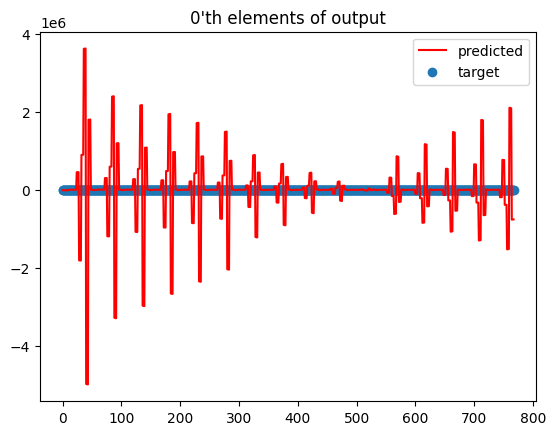

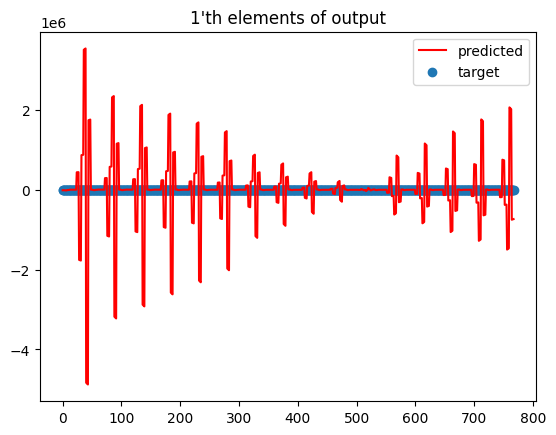

In [4]:
candidates = [1, 2, 3]
ridge_coeff = 0

kfcv = KFoldCV(X, Y)
best_params, best_loss = kfcv.findBestParameter('polynomial', candidates, num_splits=4, shuffle=True, ridge_coeff=ridge_coeff)

print('best_params: ' + str(best_params))
print('best_loss: ' + str(best_loss))

# re-construct the model with the best parameter
generator = PhiGenerator(X)
Phi = generator.generatePhi('polynomial', order=best_params)

splitter = Splitter(Phi, Y, num_splits=4, shuffle=False)
Phi_train, Phi_test, Y_train, Y_test = splitter.split()

model = MyModel()
_ = model.fit(Phi_train, Y_train, ridge_coeff=ridge_coeff, verbose=True)

train_loss = model.calcLoss(model.predict(Phi_train), Y_train)
test_loss = model.calcLoss(model.predict(Phi_test), Y_test)

print('train_loss: ' + str(train_loss))
print('test_loss: ' + str(test_loss))
Visualizer.visualize(model.predict(Phi), Y)

The last trial is one of the gaussian basis function.

best_params: 2.5
best_loss: 6013570844307.297
expected function :
y_{0} =
-803.4860159274249 x_{0}
	 + 40269822.48897891 x_{1}
	 + -105076536.78457998 x_{2}
	 + 106163374.57232153 x_{3}
	 + -41081905.14129047 x_{4}
	 + 22912511.68137122 x_{5}
	 + -57993675.29606155 x_{6}
	 + 58144593.284873135 x_{7}
	 + -22494622.18636584 x_{8}
	 + 483269467.2369747 x_{9}
	 + -1253967613.6505811 x_{10}
	 + 1250413665.569811 x_{11}
	 + -479680141.6060079 x_{12}
	 + 200549343.25295186 x_{13}
	 + -524930137.02316195 x_{14}
	 + 528812420.4597942 x_{15}
	 + -204386314.76958597 x_{16}
	 + 1067360649.50034 x_{17}
	 + -2773178375.617886 x_{18}
	 + 2771973714.6022735 x_{19}
	 + -1065386785.9863105 x_{20}
	 + 135284776.28739464 x_{21}
	 + -354584809.9398962 x_{22}
	 + 356218341.6300922 x_{23}
	 + -137451561.47281542 x_{24}
	 + -399731674.28435344 x_{25}
	 + 1041649824.9622777 x_{26}
	 + -1043861211.8137245 x_{27}
	 + 402507270.36579967 x_{28}
	 + -312333814.65713465 x_{29}
	 + 808857559.1629784 x_{30}
	 + -80714

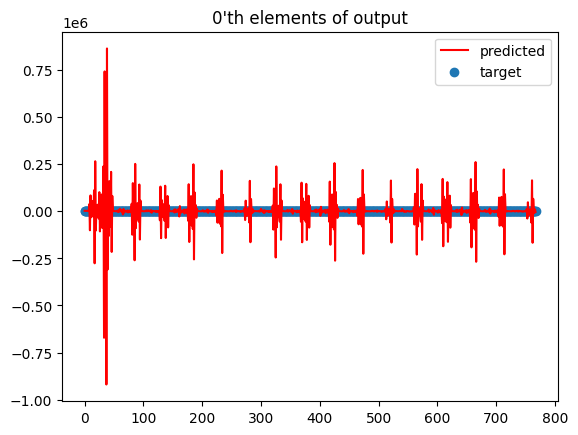

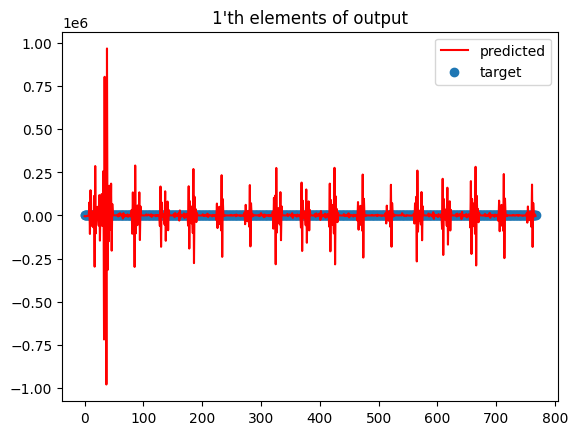

In [5]:
candidates = [0.5, 1, 1.5, 2, 2.5]
ridge_coeff = 0

kfcv = KFoldCV(X, Y)
best_params, best_loss = kfcv.findBestParameter('gaussian', candidates, num_splits=4, shuffle=True, ridge_coeff=ridge_coeff)

print('best_params: ' + str(best_params))
print('best_loss: ' + str(best_loss))

# re-construct the model with the best parameter
generator = PhiGenerator(X)
Phi = generator.generatePhi('gaussian', sigma=best_params)

splitter = Splitter(Phi, Y, num_splits=4, shuffle=False)
Phi_train, Phi_test, Y_train, Y_test = splitter.split()

model = MyModel()
_ = model.fit(Phi_train, Y_train, ridge_coeff=ridge_coeff, verbose=True)

train_loss = model.calcLoss(model.predict(Phi_train), Y_train)
test_loss = model.calcLoss(model.predict(Phi_test), Y_test)

print('train_loss: ' + str(train_loss))
print('test_loss: ' + str(test_loss))
Visualizer.visualize(model.predict(Phi), Y)

The results exhibit poor performance.　Let us try L2-Regularization.

expected function :
y_{0} =
-3.518518659760664 x_{0}
	 + -9.860457512795877 x_{1}
	 + -0.004726033958727133 x_{2}
	 + 0.0438224584480134 x_{3}
	 + -0.024274245475345013 x_{4}
	 + 4.681731902766173 x_{5}
	 + -0.032440798342945845 x_{6}
	 + 14.148479379888457 x_{7}
	 + -0.15582724692033523 x_{8}
y_{1} =
-3.162837435058269 x_{0}
	 + -9.571761990653158 x_{1}
	 + 0.0004450792920792125 x_{2}
	 + 0.0285268666191651 x_{3}
	 + -0.014040892903716923 x_{4}
	 + 4.938350368331519 x_{5}
	 + 0.16452159311815404 x_{6}
	 + 10.71814745753813 x_{7}
	 + -0.18167745976420369 x_{8}
train_loss: 18.078560383395217
test_loss: 32.46827788083841


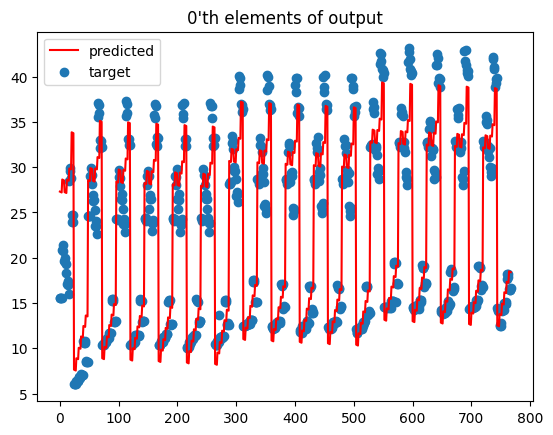

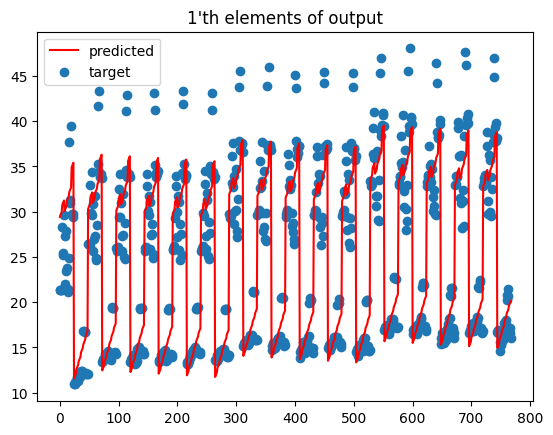

In [6]:
generator = PhiGenerator(X)
Phi = generator.generatePhi('linear')

ridge_coeff = 1

splitter = Splitter(Phi, Y, num_splits=4, shuffle=False)
Phi_train, Phi_test, Y_train, Y_test = splitter.split()

model = MyModel()
_ = model.fit(Phi_train, Y_train, ridge_coeff=ridge_coeff, verbose=True)

train_loss = model.calcLoss(model.predict(Phi_train), Y_train)
test_loss = model.calcLoss(model.predict(Phi_test), Y_test)

print('train_loss: ' + str(train_loss))
print('test_loss: ' + str(test_loss))
Visualizer.visualize(model.predict(Phi), Y)

best_params: 2
best_loss: 10.835958676815443
expected function :
y_{0} =
0.09263906405205856 x_{0}
	 + 0.06594522702883969 x_{1}
	 + 1.368358668015198 x_{2}
	 + -7.038158862818836 x_{3}
	 + 2.390558697850719 x_{4}
	 + -1.0377482474017499 x_{5}
	 + -0.3557894696681769 x_{6}
	 + 0.5841061103936548 x_{7}
	 + -0.6432545529977305 x_{8}
	 + 0.20764165499148338 x_{9}
	 + -0.4682191876955818 x_{10}
	 + 4.21292773293819 x_{11}
	 + -2.3703529954541978 x_{12}
	 + 2.1128600745081334 x_{13}
	 + 0.17709050895376333 x_{14}
	 + 1.1017770551281483 x_{15}
	 + -0.27739642341478543 x_{16}
	 + -0.0008131723620380207 x_{17}
	 + 0.00423490836207596 x_{18}
	 + -0.0025764847029988657 x_{19}
	 + 0.09477971169501641 x_{20}
	 + 1.0564255266405184e-05 x_{21}
	 + -0.002346154207328588 x_{22}
	 + 0.0006767257240508501 x_{23}
	 + -0.00018724841884139567 x_{24}
	 + 0.0022072257220815484 x_{25}
	 + 0.05339673773422228 x_{26}
	 + 0.0007052927886036969 x_{27}
	 + 0.02478960267048111 x_{28}
	 + -0.001176495604521332 x_{29

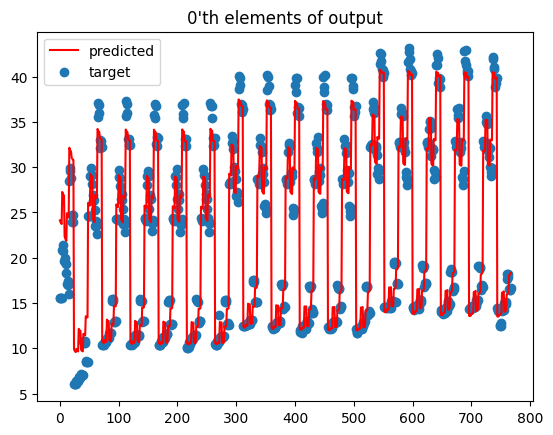

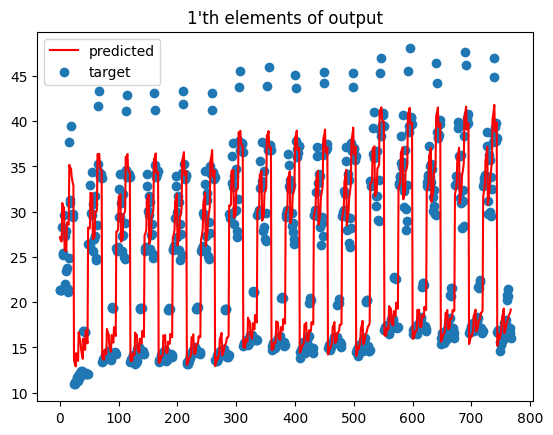

In [7]:
candidates = [1, 2, 3]
ridge_coeff = 1

kfcv = KFoldCV(X, Y)
best_params, best_loss = kfcv.findBestParameter('polynomial', candidates, num_splits=4, shuffle=True, ridge_coeff=ridge_coeff)

print('best_params: ' + str(best_params))
print('best_loss: ' + str(best_loss))

# re-construct the model with the best parameter
generator = PhiGenerator(X)
Phi = generator.generatePhi('polynomial', order=best_params)

splitter = Splitter(Phi, Y, num_splits=4, shuffle=False)
Phi_train, Phi_test, Y_train, Y_test = splitter.split()

model = MyModel()
_ = model.fit(Phi_train, Y_train, ridge_coeff=ridge_coeff, verbose=True)

train_loss = model.calcLoss(model.predict(Phi_train), Y_train)
test_loss = model.calcLoss(model.predict(Phi_test), Y_test)

print('train_loss: ' + str(train_loss))
print('test_loss: ' + str(test_loss))
Visualizer.visualize(model.predict(Phi), Y)

best_params: 1
best_loss: 14.6114345250948
expected function :
y_{0} =
21.207827383488894 x_{0}
	 + 0.6709251426187242 x_{1}
	 + 0.4630789681443217 x_{2}
	 + 0.5259089438077641 x_{3}
	 + 0.7699357050020502 x_{4}
	 + 1.059894484527348 x_{5}
	 + 0.7738114010437218 x_{6}
	 + 0.7408759779494581 x_{7}
	 + 1.0797155025223186 x_{8}
	 + 0.7084254908674621 x_{9}
	 + 0.5349824409525943 x_{10}
	 + 0.5672122686678153 x_{11}
	 + 0.7604107887066698 x_{12}
	 + 0.6023316814186517 x_{13}
	 + 0.5412250007161291 x_{14}
	 + 0.5788194512442797 x_{15}
	 + 0.6753850640945938 x_{16}
	 + 1.4958618336061342 x_{17}
	 + 1.1012132023362535 x_{18}
	 + 1.1176620765968286 x_{19}
	 + 1.6227516129543282 x_{20}
	 + 1.4534348898410303 x_{21}
	 + 0.8148141277386142 x_{22}
	 + 0.9273630933533917 x_{23}
	 + 1.388891687353281 x_{24}
	 + -0.7209673085636583 x_{25}
	 + -0.49027555958015734 x_{26}
	 + -0.49524613605697065 x_{27}
	 + -0.6971082484108223 x_{28}
	 + -0.7027398434077325 x_{29}
	 + -0.4743054038811527 x_{30}
	 + -0.

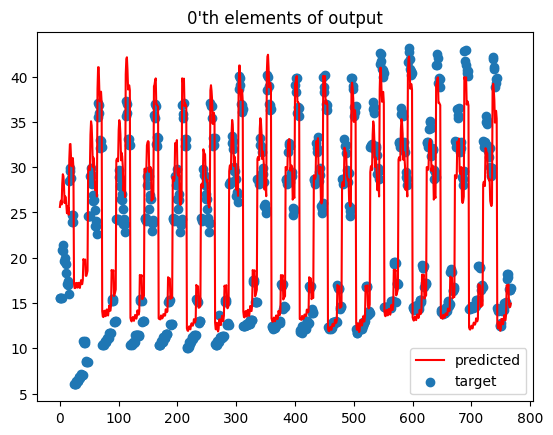

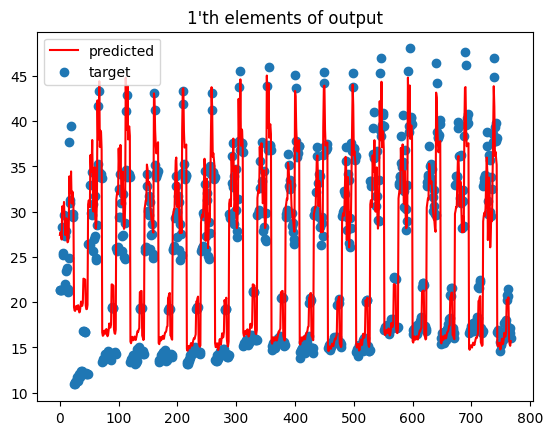

In [8]:
candidates = [0.5, 1, 1.5, 2, 2.5]
ridge_coeff = 1

kfcv = KFoldCV(X, Y)
best_params, best_loss = kfcv.findBestParameter('gaussian', candidates, num_splits=4, shuffle=True, ridge_coeff=ridge_coeff)

print('best_params: ' + str(best_params))
print('best_loss: ' + str(best_loss))

# re-construct the model with the best parameter
generator = PhiGenerator(X)
Phi = generator.generatePhi('gaussian', sigma=best_params)

splitter = Splitter(Phi, Y, num_splits=4, shuffle=False)
Phi_train, Phi_test, Y_train, Y_test = splitter.split()

model = MyModel()
_ = model.fit(Phi_train, Y_train, ridge_coeff=ridge_coeff, verbose=True)

train_loss = model.calcLoss(model.predict(Phi_train), Y_train)
test_loss = model.calcLoss(model.predict(Phi_test), Y_test)

print('train_loss: ' + str(train_loss))
print('test_loss: ' + str(test_loss))
Visualizer.visualize(model.predict(Phi), Y)

Ridge regression yielded substantial improvements in model performance.

#### <span style="color: red; ">**Acknowledgements**</span>

We would like to acknowledge the use of data from the UCI Machine Learning Repository.

#### <span style="color: red; ">**References**</span>

* R. Kondor, "Regression by linear combination of basis functions", February 5, 2004, http://www.cs.columbia.edu/~jebara/4771/tutorials/regression.pdf